In [ ]:
from models.preferences.preference_utils import (
    get_child_data,
    initialize_child_preference_data,
    print_preference_difference_and_accuracy,
    calculate_percent_of_known_ingredients_to_unknown,
    plot_individual_child_known_percent,
    plot_preference_and_sentiment_accuracies,
    plot_utilities_and_mape,
    plot_utilities_from_json,
)

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Configure Matplotlib to use LaTeX for rendering
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",  # Use serif font in conjunction with LaTeX
    "text.latex.preamble": r"\usepackage{times}",
})

def plot_ingredient_data_histograms(ingredient_df, rotation=15, fontsize=12):
    # Convert child_data to a DataFrame
    df = pd.DataFrame(ingredient_df)

    # Plotting histograms for each feature
    features = ['Colour', 'Taste', 'Texture', 'Healthy']

    fig, axes = plt.subplots(2, 2, figsize=(12, 4))
    axes = axes.flatten()

    for idx, feature in enumerate(features):
        if df[feature].dtype == 'object':
            # For categorical data
            df[feature].value_counts().plot(kind='bar', ax=axes[idx], color='skyblue')
            axes[idx].set_ylabel('Count', fontsize=fontsize)
            # Format the x-tick labels
            formatted_labels = [label.replace('_', ' ').title() if isinstance(label, str) else label for label in df[feature].value_counts().index]
            axes[idx].set_xticklabels(formatted_labels, rotation=rotation, fontsize=fontsize)
        else:
            # For numerical data
            df[feature].plot(kind='hist', ax=axes[idx], bins=range(8, 13), color='skyblue')
            axes[idx].set_ylabel('Frequency', fontsize=fontsize)
            axes[idx].set_xticks(range(8, 13))
            axes[idx].tick_params(axis='x', labelsize=fontsize)

        # Capitalize and remove underscores in the feature name for xlabel
        formatted_feature = feature.replace('_', ' ').title()
        axes[idx].set_xlabel(formatted_feature, fontsize=fontsize)

    plt.tight_layout()
    plt.show()

    # Count the number of 1s in specified groups
    groups = ['Group A veg', 'Group A fruit', 'Group BC', 'Group D', 'Group E', 'Bread', 'Confectionary']
    
    group_rename = {
        'Group A veg': 'Vegetables',
        'Group A fruit': 'Fruits',
        'Group BC': 'Protein',
        'Group D': 'Carbs',
        'Group E': 'Dairy',
        'Bread': 'Bread',
        'Confectionary': 'Confectionary'
    }
    
    counts = {group: df[group].sum() for group in groups}

    # Rename the groups for the plot
    renamed_counts = {group_rename[group]: count for group, count in counts.items()}

    # Plot the counts on a bar chart
    fig, ax = plt.subplots(figsize=(6, 3))
    ax.bar(renamed_counts.keys(), renamed_counts.values(), color='skyblue')
    ax.set_xlabel('Groups', fontsize=fontsize)
    ax.set_ylabel('Number of Ingredients in Group', fontsize=fontsize)
    plt.xticks(rotation=15, fontsize=fontsize)
    plt.tight_layout()
    plt.show()
# Configure Matplotlib to use LaTeX for rendering
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",  # Use serif font in conjunction with LaTeX
    "text.latex.preamble": r"\usepackage{times}",
})

    
from utils.process_data import get_data
ingredient_df = get_data("data.csv")


plot_ingredient_data_histograms(ingredient_df)


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Configure Matplotlib to use LaTeX for rendering
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",  # Use serif font in conjunction with LaTeX
    "text.latex.preamble": r"\usepackage{times}",
})

def plot_child_data_histograms(child_data, rotation=0, fontsize=12):
    # Convert child_data to a DataFrame
    df = pd.DataFrame(child_data).T

    # Plotting histograms for each feature
    features = ['age', 'gender', 'health_consideration', 'favorite_cuisine']

    fig, axes = plt.subplots(2, 2, figsize=(12, 4))
    axes = axes.flatten()

    for idx, feature in enumerate(features):
        if df[feature].dtype == 'object':
            # For categorical data
            df[feature].value_counts().plot(kind='bar', ax=axes[idx], color='skyblue')
            axes[idx].set_ylabel('Count', fontsize=fontsize)
            # Format the x-tick labels
            formatted_labels = [label.replace('_', ' ').title() if isinstance(label, str) else label for label in df[feature].value_counts().index]
            axes[idx].set_xticklabels(formatted_labels, rotation=rotation, fontsize=fontsize)
        else:
            # For numerical data
            df[feature].plot(kind='hist', ax=axes[idx], bins=range(8, 13), color='skyblue')
            axes[idx].set_ylabel('Frequency', fontsize=fontsize)
            axes[idx].set_xticks(range(8, 13))
            axes[idx].tick_params(axis='x', labelsize=fontsize)

        # Capitalize and remove underscores in the feature name for xlabel
        formatted_feature = feature.replace('_', ' ').title()
        # axes[idx].set_title(f'Histogram of {formatted_feature}', fontsize=fontsize)
        axes[idx].set_xlabel(formatted_feature, fontsize=fontsize)

    plt.tight_layout()
    plt.show()
# Configure Matplotlib to use LaTeX for rendering
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",  # Use serif font in conjunction with LaTeX
    "text.latex.preamble": r"\usepackage{times}",
})

    
child_data = get_child_data()
plot_child_data_histograms(child_data)


In [ ]:
ingredient_df = get_data("data.csv")
child_data = get_child_data()
data = initialize_child_preference_data(child_data=child_data, ingredient_df=ingredient_df, plot_graphs=True, child_key_plot='c2hild23')

In [ ]:
from models.preferences.sentiment_analysis import SentimentAnalyzer
from models.preferences.menu_generators import RandomMenuGenerator
from models.preferences.prediction import PreferenceModel
from models.preferences.voting import IngredientNegotiator

child_data = get_child_data()
ingredient_df = get_data("data.csv")
true_child_preference_data = initialize_child_preference_data(child_data, ingredient_df, seed=None, plot_graphs=False, split = 0.5)

# Set to zero for complete randomness
probability_best = 0
# Random is all equal and score is based on the score of the ingredient in terms of the negotiated list
weight_type = "random"
# weight_type = "score"
menu_plan_length = 10
seed = None

# Complex weight function arguments
complex_weight_func_args = {
    'use_normalize_total_voting_weight': False,
    'use_normalize_vote_categories': True,
    'use_compensatory': True,
    'use_feedback': True,
    'use_fairness': True,
    'target_gini': 0.15,
}
weight_function = 'simple'



In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt

# Initialize the subplot grid
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
axes = axes.flatten()  # Flatten to easily iterate over the axes

# Iterate over each model in the dictionary, except the 'perfect' model
model_name_dict = {
    'roberta': "cardiffnlp/twitter-roberta-base-sentiment",
    'bertweet': "finiteautomata/bertweet-base-sentiment-analysis",
    'distilroberta': "mrm8488/distilroberta-finetuned-financial-news-sentiment-analysis",
    '5_star': "nlptown/bert-base-multilingual-uncased-sentiment",
    'perfect': "perfect",  # Skip this one
    'TextBlob': "TextBlob",
    'Vader': "Vader"
}

iterations = 50  # Number of iterations for each model
index = 0  # Index for subplots

for model_name in model_name_dict.keys():
    if model_name == "perfect":
        continue  # Skip the 'perfect' model

    all_true_labels = []
    all_pred_labels = []

    for _ in range(iterations):
        # Initialize and run the preference model
        predictor = PreferenceModel(
            ingredient_df, child_data, true_child_preference_data, visualize_data=False, apply_SMOTE=True, file_path=None, seed=seed
        )
        updated_known_and_predicted_preferences = predictor.run_pipeline()

        previous_feedback = {}
        previous_utility = {}

        # Initial negotiation of ingredients
        negotiator = IngredientNegotiator(
            seed, ingredient_df, updated_known_and_predicted_preferences, previous_feedback, previous_utility, complex_weight_func_args
        )

        negotiated_ingredients, unavailable_ingredients = negotiator.negotiate_ingredients(weight_function=weight_function)

        # Calculate week and day
        week = 1
        day = 1

        # Save negotiation results
        negotiator.close("log_file.json", week=week, day=day)

        menu_generator = RandomMenuGenerator(menu_plan_length=10, weight_type='random', probability_best=probability_best, seed=None)

        # Generate menu based on negotiated list
        menu_plan = menu_generator.generate_menu(negotiated_ingredients, unavailable_ingredients, save_paths={'data': '', 'graphs': ''}, week=week, day=day)

        # Sentiment analysis initiation, initially with true preference data and will adapt it to updated preferences from feedback
        sentiment_analyzer = SentimentAnalyzer(
            true_child_preference_data, menu_plan, model_name=model_name, seed=None
        )

        # Get updated preferences from feedback, the sentiment accuracy and feedback given
        updated_known_unknown_preferences_with_feedback, sentiment_accuracy, feedback_given, true_labels, pred_labels = sentiment_analyzer.get_sentiment_and_update_data(plot_confusion_matrix=False)

        # Remove None values from true_labels and corresponding pred_labels
        filtered_true_labels = []
        filtered_pred_labels = []

        for true_label, pred_label in zip(true_labels, pred_labels):
            if true_label is not None:  # Filter out None values
                filtered_true_labels.append(true_label)
                filtered_pred_labels.append(pred_label)

        # Collect filtered labels from this iteration
        all_true_labels.extend(filtered_true_labels)
        all_pred_labels.extend(filtered_pred_labels)

        # Assign the feedback given to the previous feedback for complex weight calculation
        previous_feedback = feedback_given

    # Calculate overall accuracy
    accuracy = accuracy_score(all_true_labels, all_pred_labels) * 100

    # Generate and plot the confusion matrix
    cm = confusion_matrix(all_true_labels, all_pred_labels, labels=['likes', 'neutral', 'dislikes'])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['likes', 'neutral', 'dislikes'])

    # Plot on the current subplot
    disp.plot(ax=axes[index], cmap=plt.cm.Blues, xticks_rotation=0)
    axes[index].set_title(f'{model_name}, Accuracy: {accuracy:.1f}\\%', fontsize=14)
    axes[index].set_xlabel('Predicted', fontsize=14)
    axes[index].set_ylabel('True', fontsize=14)
    axes[index].tick_params(axis='both', labelsize=12)

    index += 1  # Move to the next subplot

# Adjust layout spacing between subplots
plt.subplots_adjust(hspace=0, wspace=-0.75)

# Adjust layout
plt.tight_layout()
plt.show()


# Prediction

In [ ]:
from utils.process_data import get_data
from models.preferences.preference_utils import get_child_data, initialize_child_preference_data, print_preference_difference_and_accuracy
from models.preferences.prediction import PreferenceModel
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, make_scorer


name ='Random Forest'

        # models = {
        #     "Logistic Regression": LogisticRegression(solver='liblinear', C=1.0, max_iter=10000),
        #     "Support Vector Machine": SVC(C=1.0, kernel='rbf', probability=True),
        #     "XGBoost": XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, eval_metric='logloss'),
        #     "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=None, criterion='gini'),
        #     "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3),
        #     "AdaBoost": AdaBoostClassifier(n_estimators=50, learning_rate=1.0, algorithm='SAMME.R'),
        #     "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto'),
        #     "Decision Tree": DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None),
        #     "Gaussian Naive Bayes": GaussianNB(),
        #     "Stochastic Gradient Descent": SGDClassifier(loss='hinge', alpha=0.0001, max_iter=1000, tol=1e-3),
        #     "MLP Classifier": MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=200)
        # }

child_feature_data = get_child_data()
ingredient_df = get_data("data.csv")
initial_preference = initialize_child_preference_data(child_feature_data, ingredient_df, split = 0.5, seed=None, plot_graphs=False)

predictor = PreferenceModel(
    ingredient_df, child_feature_data, initial_preference, model_name=name, visualize_data=True, apply_SMOTE=True, file_path='preferences_visualization.png', seed=None
)
updated_preferences, true_labels, predicted_labels = predictor.run_pipeline()

accuracy = accuracy_score(true_labels, predicted_labels)

accuracy_total, std = print_preference_difference_and_accuracy(initial_preference, updated_preferences, summary_only=True)

print(accuracy)

print(accuracy_total)

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score, StratifiedKFold
from utils.process_data import get_data
from models.preferences.preference_utils import get_child_data, initialize_child_preference_data, print_preference_difference_and_accuracy
from models.preferences.prediction import PreferenceModel
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, make_scorer
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, make_scorer

import os
from utils.process_data import get_data
from models.preferences.preference_utils import print_preference_difference_and_accuracy
from models.preferences.preference_utils import get_child_data, initialize_child_preference_data

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

models = {
    "Logistic Regression": LogisticRegression(solver='lbfgs', C=10, max_iter=10000, class_weight='balanced'),
    "Support Vector Machine": SVC(C=1.0, kernel='rbf', probability=True, class_weight='balanced'),
    "XGBoost": XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, objective='multi:softmax', eval_metric='mlogloss', scale_pos_weight=1),  # XGBoost uses scale_pos_weight for class balancing
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=None, criterion='gini', class_weight='balanced'),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3),  # No direct class_weight support
    "AdaBoost": AdaBoostClassifier(n_estimators=50, learning_rate=1.0, algorithm='SAMME.R'),  # No direct class_weight support
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto'),  # No direct class_weight support
    "Decision Tree": DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, class_weight='balanced'),
    "Gaussian Naive Bayes": GaussianNB(),  # No direct class_weight support
    "Stochastic Gradient Descent": SGDClassifier(loss='hinge', alpha=0.0001, max_iter=2000, tol=1e-3, class_weight='balanced'),
    "MLP Classifier": MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=2000)  # No direct class_weight support
}

# Define scorers with `average='macro'` set only for the appropriate metrics
scorers = {
'precision_macro': make_scorer(precision_score, average='macro', zero_division=0),
'recall_macro': make_scorer(recall_score, average='macro', zero_division=0),
'f1_macro': make_scorer(f1_score, average='macro', zero_division=0),
'accuracy': make_scorer(accuracy_score)  # No `average` parameter here
}

child_feature_data = get_child_data()
ingredient_df = get_data("data.csv")

# Initial prediction of preferences
file_path = os.path.join('', "preferences_visualization.png")



# Assuming all imports and other necessary function definitions have been done as in the provided code.

def evaluate_models():
    # Evaluate models using cross-validation
    results = []
    
    for iter in range(10):
        for split in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]:
            initial_preference = initialize_child_preference_data(child_feature_data, ingredient_df, split = split, seed=None, plot_graphs=False)
            for apply_SMOTE in [True, False]:
                for name, model in models.items():

                    predictor = PreferenceModel(
                        ingredient_df, child_feature_data, initial_preference, model_name=name, visualize_data=False, apply_SMOTE=apply_SMOTE, file_path=file_path, seed=None
                    )
                    updated_preferences, true_labels, predicted_labels = predictor.run_pipeline()
                    accuracy_total, std = print_preference_difference_and_accuracy(initial_preference, updated_preferences, summary_only=True)
                    del updated_preferences
                    # Calculate accuracy
                    accuracy = accuracy_score(true_labels, predicted_labels)

                    # Print the model, accuracy, and iteration
                    print(f"Iteration: {iter + 1}, Model: {name}, SMOTE: {apply_SMOTE}, Accuracy: {accuracy:.4f}, Total Accuracy: {accuracy_total:.4f}")

                    # Loop over each scorer
                    for scorer_name, scorer in scorers.items():
                        # Calculate the score using the scorer
                        if scorer_name in ['precision_macro', 'recall_macro', 'f1_macro']:
                            score = scorer._score_func(true_labels, predicted_labels, average='macro')
                        else:
                            score = scorer._score_func(true_labels, predicted_labels)
                        
                        results.append({
                            "Iteration": iter,
                            "Split": split,
                            "SMOTE": apply_SMOTE,
                            "Model": name,
                            "Metric": scorer_name,
                            "Score": score
                        })

        # Convert results to DataFrame for easy comparison
        results_df = pd.DataFrame(results)
        
        return results_df


def get_ranked_models(results_df):
    # Rank models for each metric
    ranked_results = results_df.copy()
    ranked_results['Rank'] = ranked_results.groupby('Metric')['Score'].rank(ascending=False, method='min')

    # Convert results to DataFrame for easy comparison
    results_df_sorted = ranked_results.sort_values(by=['Metric', 'Rank'])

    print(results_df_sorted)
    return results_df_sorted


# Example usage:

results_df = evaluate_models()
sorted_results_df = get_ranked_models(results_df)

    

In [ ]:
# Assuming `sorted_results_df` is your sorted DataFrame from the previous code
output_file_path = "sorted_results.csv"

# Save the DataFrame to a CSV file
sorted_results_df.to_csv(output_file_path, index=False)

print(f"Sorted results have been saved to {output_file_path}")


In [ ]:
grouped.to_excel("grouped_results.xlsx")

In [ ]:
# Group by 'Model', 'Split', 'Metric', and 'SMOTE', and calculate the mean, std, and count of 'Score'
grouped = sorted_results_df.groupby(['Model', 'Split', 'Metric']).agg({'Score': ['mean', 'std', 'count']}).reset_index()

# If you want to average over the 'SMOTE' column, drop it from the groupby first or adjust the calculation.
# For example, if you want to average over 'SMOTE' and calculate the mean score across all SMOTE conditions:


# Sort by the mean score (descending) to find the best model
grouped_avg = grouped.sort_values(by=('Score', 'mean'), ascending=False)


# Display the top 10 models
top_10_models = grouped_avg.head(20)

# Display the results
print(top_10_models)


In [ ]:
import matplotlib.pyplot as plt

# Configure Matplotlib to use LaTeX for rendering
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",  # Use serif font in conjunction with LaTeX
    "text.latex.preamble": r"\usepackage{times}",
})

# Extract unique models
models = grouped['Model'].unique()
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'magenta']

# Map models to colors
model_colors = {model: colors[i % len(colors)] for i, model in enumerate(models)}

# Plotting the data
plt.figure(figsize=(8, 5))
for model in models:
    filtered1 = grouped[grouped['Model'] == model]  # Filter data for the model
    model_data = filtered1[filtered1['Metric'] == 'accuracy']  # Filter data for the accuracy metric
    
    # Sort data by Split to ensure lines connect properly
    model_data = model_data.sort_values(by='Split')
    
    # Plotting lines between points
    plt.plot(model_data['Split'], model_data['Score']['mean'],
             color=model_colors[model],
             linestyle='-',  # Line style for connecting points
             label=model)
    
    # Plotting the scatter points with crosses
    plt.scatter(model_data['Split'], model_data['Score']['mean'],
                color=model_colors[model],
                marker='x')  # Cross marker for scatter points

# Adding labels and title with custom font size
plt.xlabel(r'Split Ratio', fontsize=14)
plt.ylabel(r'Accuracy', fontsize=14)
plt.tick_params(axis='both', labelsize=12)

# Creating a legend outside the plot, on the right
plt.legend(title="Model Type", loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12, title_fontsize=12)

plt.show()


In [ ]:
import pandas as pd
import optuna
import os
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from models.preferences.prediction import PreferenceModel
from models.preferences.preference_utils import print_preference_difference_and_accuracy
from models.preferences.preference_utils import get_child_data, initialize_child_preference_data
from utils.process_data import get_data

# Define models with initial hyperparameters
models = {
    "Logistic Regression": LogisticRegression(solver='liblinear', C=1.0, max_iter=10000, class_weight='balanced'),
    "Support Vector Machine": SVC(C=1.0, kernel='rbf', probability=True, class_weight='balanced'),
    "XGBoost": XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, eval_metric='logloss', scale_pos_weight=1),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=None, criterion='gini', class_weight='balanced'),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
}

# Define scorers
scorers = {
    'precision_macro': make_scorer(precision_score, average='macro', zero_division=0),
    'recall_macro': make_scorer(recall_score, average='macro', zero_division=0),
    'f1_macro': make_scorer(f1_score, average='macro', zero_division=0),
    'accuracy': make_scorer(accuracy_score)
}

# Load and preprocess data
child_feature_data = get_child_data()
ingredient_df = get_data("data.csv")
file_path = os.path.join('', "preferences_visualization.png")

# Function to optimize hyperparameters using Optuna with an option to apply SMOTE
def optimize_hyperparameters(model_name, ingredient_df, child_feature_data, initial_preference, apply_smote=False, n_trials=250):
    def objective(trial):
        # Re-initialize preferences for each trial
        initial_preference = initialize_child_preference_data(child_feature_data, ingredient_df, split=0.35, seed=None, plot_graphs=False)
        apply_smote = trial.suggest_categorical('apply_smote', [True, False])
        # Define the hyperparameter search space
        if model_name == "XGBoost":
            params = {
                'n_estimators': trial.suggest_int('n_estimators', 50, 300),
                'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
                'max_depth': trial.suggest_int('max_depth', 3, 10),
                'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
                'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
                'scale_pos_weight': trial.suggest_uniform('scale_pos_weight', 1.0, 3.0),
                'eval_metric': 'mlogloss',
                'use_label_encoder': False
            }
            model = XGBClassifier(**params)
        elif model_name == "Random Forest":
            params = {
                'n_estimators': trial.suggest_int('n_estimators', 50, 300),
                'max_depth': trial.suggest_int('max_depth', 5, 30),
                'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
                'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 4),
                'max_features': trial.suggest_categorical('max_features', ['auto', 'sqrt', 'log2']),
                'class_weight': 'balanced'
            }
            model = RandomForestClassifier(**params)
        elif model_name == "Support Vector Machine":
            params = {
                'C': trial.suggest_loguniform('C', 1e-3, 1e2),
                'kernel': trial.suggest_categorical('kernel', ['linear', 'rbf', 'poly']),
                'gamma': trial.suggest_loguniform('gamma', 1e-4, 1e-1),
                'probability': True,
                'class_weight': 'balanced'
            }
            model = SVC(**params)
            
        elif model_name == "MLP Classifier":
            params = {
                'hidden_layer_sizes': trial.suggest_categorical('hidden_layer_sizes', [(50,), (100,), (50, 50), (100, 100)]),
                'activation': trial.suggest_categorical('activation', ['relu', 'tanh', 'logistic']),
                'solver': trial.suggest_categorical('solver', ['adam', 'lbfgs']),
                'alpha': trial.suggest_loguniform('alpha', 1e-5, 1e-2),
                'learning_rate': trial.suggest_categorical('learning_rate', ['constant', 'adaptive']),
                'max_iter': 10000
            }
            model = MLPClassifier(**params)
            
        elif model_name == "Decision Tree":
            params = {
                'criterion': trial.suggest_categorical('criterion', ['gini', 'entropy']),
                'splitter': trial.suggest_categorical('splitter', ['best', 'random']),
                'max_depth': trial.suggest_int('max_depth', 2, 20),
                'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
                'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
                'max_features': trial.suggest_categorical('max_features', [None, 'auto', 'sqrt', 'log2']),
                'class_weight': 'balanced'
            }
            model = DecisionTreeClassifier(**params)
            
        else:
            raise ValueError(f"Model {model_name} not found in the defined models.")

        # Re-run the preference model with the new hyperparameters
        predictor = PreferenceModel(
            ingredient_df, child_feature_data, initial_preference, model_name=model_name,
            visualize_data=False, apply_SMOTE=apply_smote, file_path=file_path, seed=None
        )
        
        updated_preferences, true_labels, predicted_labels = predictor.run_pipeline()
        del updated_preferences
        # Calculate accuracy
        accuracy = accuracy_score(true_labels, predicted_labels)
        
        return accuracy
    
    study = optuna.create_study(direction='maximize', sampler=optuna.samplers.TPESampler())
    study.optimize(objective, n_trials=n_trials)
    
    print(f"\nBest hyperparameters for {model_name}:")
    print(study.best_params)
    print(f"Best cross-validation accuracy: {study.best_value:.4f}")
    
    return study.best_params, study.best_value

# Main execution
top_models = ["MLP Classifier", "XGBoost", "Random Forest", "Support Vector Machine", "Decision Tree"]

# Initialize preferences for Optuna optimization
initial_preference = initialize_child_preference_data(child_feature_data, ingredient_df, split=0.35, seed=None, plot_graphs=False)

# Optimize hyperparameters for each of the top 3 models with and without SMOTE
optimized_models = {}
for model_name in top_models:
    print(f"\nOptimizing hyperparameters for {model_name}")
    best_params_smote, best_score_smote = optimize_hyperparameters(model_name, ingredient_df, child_feature_data, initial_preference, apply_smote=True)
    
    optimized_models[model_name] = {
        'best_params_smote': best_params_smote,
        'best_score_smote': best_score_smote,
    }

# Display optimized hyperparameters and scores
print("\nOptimized Hyperparameters and Scores for Top 3 Models:")
for model_name in optimized_models:
    print(f"\nModel: {model_name}")
    print(f"Best Hyperparameters: {optimized_models[model_name]['best_params_smote']}")
    print(f"Best Cross-Validation Accuracy: {optimized_models[model_name]['best_score_smote']:.4f}")


Best hyperparameters for Decision Tree:
{'apply_smote': False, 'criterion': 'entropy', 'splitter': 'best', 'max_depth': 15, 'min_samples_split': 19, 'min_samples_leaf': 3, 'max_features': 'log2'}
Best cross-validation accuracy: 0.9271

Optimized Hyperparameters and Scores for Top 3 Models:

Model: MLP Classifier
Best Hyperparameters: {'apply_smote': False, 'hidden_layer_sizes': (100,), 'activation': 'logistic', 'solver': 'lbfgs', 'alpha': 0.0001448702585671116, 'learning_rate': 'adaptive'}
Best Cross-Validation Accuracy: 0.9443

Model: XGBoost
Best Hyperparameters: {'apply_smote': False, 'n_estimators': 214, 'learning_rate': 0.0015221379497286794, 'max_depth': 6, 'subsample': 0.6228265600766979, 'colsample_bytree': 0.7421589270173782, 'scale_pos_weight': 2.4741969781216535}
Best Cross-Validation Accuracy: 0.8721

Model: Random Forest
Best Hyperparameters: {'apply_smote': False, 'n_estimators': 182, 'max_depth': 18, 'min_samples_split': 7, 'min_samples_leaf': 4, 'max_features': 'log2'}
Best Cross-Validation Accuracy: 0.9226

Model: Support Vector Machine
Best Hyperparameters: {'apply_smote': True, 'C': 0.0033922720321681796, 'kernel': 'rbf', 'gamma': 0.0002471412567416406}
Best Cross-Validation Accuracy: 0.9065

Model: Decision Tree
Best Hyperparameters: {'apply_smote': False, 'criterion': 'entropy', 'splitter': 'best', 'max_depth': 15, 'min_samples_split': 19, 'min_samples_leaf': 3, 'max_features': 'log2'}
Best Cross-Validation Accuracy: 0.9271

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
from utils.process_data import get_data
from models.preferences.preference_utils import get_child_data, initialize_child_preference_data, print_preference_difference_and_accuracy
from models.preferences.prediction import PreferenceModel
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, make_scorer

# Define the top models
top_models = ["MLP Classifier", "Random Forest", "XGBoost", "Decision Tree"]

# Initialize empty lists to accumulate true and predicted labels for each model
accumulated_true_labels = {model: [] for model in top_models}
accumulated_predicted_labels = {model: [] for model in top_models}
accuracies = {}

# Get the data
child_feature_data = get_child_data()
ingredient_df = get_data("data.csv")

# Run the loop 10 times
for i in range(10):
    print(f"Iteration {i+1}")
    
    # Reinitialize preferences
    initial_preference = initialize_child_preference_data(child_feature_data, ingredient_df, split=0.35, seed=None, plot_graphs=False)
    
    # Iterate over each model
    for name in top_models:
        # Initialize the predictor with the current model
        predictor = PreferenceModel(
            ingredient_df, child_feature_data, initial_preference, model_name=name, visualize_data=False, apply_SMOTE=False, file_path=None, seed=None
        )
        
        # Run the pipeline to get updated preferences, true labels, and predicted labels
        updated_preferences, true_labels, predicted_labels, label_encoder = predictor.run_pipeline()
        
        # Accumulate the true and predicted labels
        accumulated_true_labels[name].extend(true_labels)
        accumulated_predicted_labels[name].extend(predicted_labels)
        
        # Calculate accuracy
        accuracy = accuracy_score(true_labels, predicted_labels)
        accuracies[name] = accuracy
        print(f"{name} - Accuracy: {accuracy:.4f}")

# Save the results
results = {
    'accumulated_true_labels': accumulated_true_labels,
    'accumulated_predicted_labels': accumulated_predicted_labels,
    'accuracies': accuracies
}


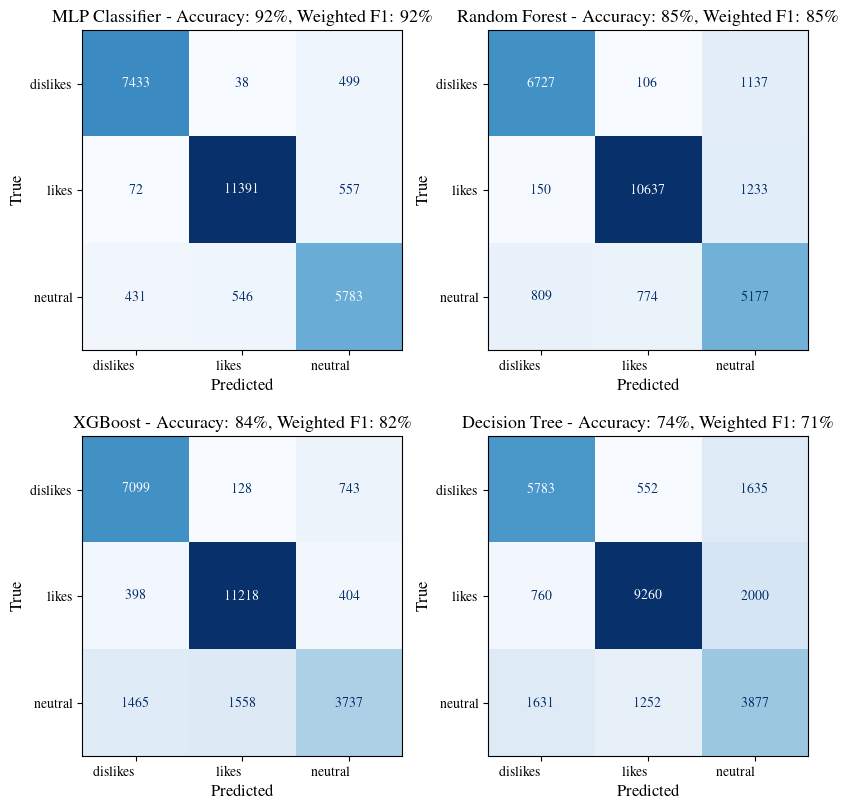

In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score

# Configure Matplotlib to use LaTeX for rendering
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",  # Use serif font in conjunction with LaTeX
    "text.latex.preamble": r"\usepackage{times}",
})


def plot_confusion_matrices(results, top_models, tick_fontsize=10, label_fontsize=12, title_fontsize=13):
    # Extract results
    accumulated_true_labels = results['accumulated_true_labels']
    accumulated_predicted_labels = results['accumulated_predicted_labels']
    accuracies = results['accuracies']
    
    # Calculate micro-average F1-scores for each model
    weighted_avg_f1_scores = {}
    for name in top_models:
        weighted_avg_f1_scores[name] = f1_score(accumulated_true_labels[name], accumulated_predicted_labels[name], average='weighted')
    
    # Plot confusion matrices in a square layout suitable for A4 page
    fig, axes = plt.subplots(2, 2, figsize=(8.27, 8.27))  # Square plot on A4 page
    axes = axes.flatten()

    for idx, name in enumerate(top_models):
        # Calculate the confusion matrix
        cm = confusion_matrix(accumulated_true_labels[name], accumulated_predicted_labels[name])
        
        # Plot the confusion matrix without the color bar
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot(ax=axes[idx], cmap=plt.cm.Blues, colorbar=False, values_format='d')
        
        # Inverse transform the labels to their original form
        class_names = label_encoder.inverse_transform(range(len(cm)))
        axes[idx].set_xticks(range(len(class_names)))
        axes[idx].set_yticks(range(len(class_names)))
        axes[idx].set_xticklabels(class_names, fontsize=tick_fontsize, rotation=0, ha="right")
        axes[idx].set_yticklabels(class_names, fontsize=tick_fontsize)
        
        # Set the title with the model name, accuracy, and micro F1-score
        overall_accuracy = accuracies[name]
        weighted_f1 = weighted_avg_f1_scores[name]
        axes[idx].set_title(
            f"{name} - Accuracy: {overall_accuracy * 100:.0f}\\%, Weighted F1: {weighted_f1 * 100:.0f}\\%", 
            fontsize=title_fontsize
        )
        
        # Set font size for ticks and labels
        axes[idx].tick_params(axis='both', which='major', labelsize=tick_fontsize)
        axes[idx].set_xlabel(axes[idx].get_xlabel().split(" ")[0], fontsize=label_fontsize)
        axes[idx].set_ylabel(axes[idx].get_ylabel().split(" ")[0], fontsize=label_fontsize)

    plt.tight_layout()
    plt.show()

# Call the plotting function
plot_confusion_matrices(results, top_models)